In [2]:
! pip install plotly
! pip install plotly-geo
! pip install -U plotly 

Requirement already up-to-date: plotly in c:\programdata\anaconda3\lib\site-packages (4.14.3)


# Load libraries

In [25]:
import geopandas as gpd
from matplotlib import pyplot as plt
import plotly

import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

import plotly.figure_factory as ff
import numpy as np
import shapely

In [6]:
cbg_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\Park_visits\vectors\USA_Block_Group_Boundaries.shp'

cbg_gdf = gpd.read_file(cbg_file)

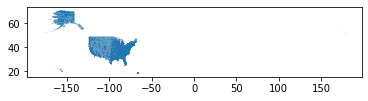

In [7]:
cbg_gdf.plot()

In [8]:
cbg_gdf["centroid"] = cbg_gdf["geometry"].centroid

<ipython-input-8-2c9d60ba308c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cbg_gdf["centroid"] = cbg_gdf["geometry"].centroid


In [9]:
cbg_gdf["lon"] = cbg_gdf["centroid"].x
cbg_gdf["lat"] = cbg_gdf["centroid"].y
cbg_gdf["lat"]

0         25.869012
1         21.170714
2         21.262815
3         21.267758
4         21.262688
            ...    
219826    46.829819
219827    46.974708
219828    46.774227
219829    47.250169
219830    52.371811
Name: lat, Length: 219831, dtype: float64

In [10]:
edges_file = r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns\2021\05\05\02\monthly_pattern_to_present_edges_2021-05-05.csv'

In [11]:
edge_df = pd.read_csv(edges_file)
edge_df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,placekey,visitor_home_cbgs,visits
0,227-222@5pw-3bs-p7q,551332034063,4
1,227-222@5pw-3bs-p7q,170318125003,4
2,222-222@8f3-4ts-pvz,220419503002,8
3,222-222@8f3-4ts-pvz,220419503001,6
4,222-222@8f3-4ts-pvz,220419506001,6
...,...,...,...
82602676,222-222@5xc-qyx-fs5,410670328001,4
82602677,223-222@8gb-cpy-swk,471779308003,5
82602678,223-222@8gb-cpy-swk,471779302001,4
82602679,223-222@8gb-cpy-swk,471779301001,4


In [12]:
g1 = edge_df.groupby("visitor_home_cbgs", as_index=False).sum()

In [13]:
g1.sort_values("visits")

,visitor_home_cbgs,visits
134165,360610081004,4
31400,60952532052,4
134946,360610297000,4
134947,360610297001,4
434050,720310502312,4
...,...,...
264488,120950167301,84217
405114,481576732002,95431
264527,120950171032,99123
405100,481576729001,109075


In [16]:
edge_df['visits'].sum()

456033796

In [17]:
assert(edge_df['visits'].sum() == g1['visits'].sum())

# load home panel

In [21]:
len(edge_df[edge_df['visitor_home_cbgs'].str[:2] == "45"])

,placekey,visitor_home_cbgs,visits
364,223-222@64h-vkv-f2k,450150207252,4
1236,224-223@8gd-q65-ckf,450450028121,4
1431,223-222@8gf-jp6-qvf,450910614011,7
1432,223-222@8gf-jp6-qvf,450910619003,5
1433,223-222@8gf-jp6-qvf,450910616012,4
...,...,...,...
82574299,224-222@8gq-wg4-cwk,450910609073,4
82574749,zzy-224@645-9t9-swk,450510505002,4
82574751,zzy-224@645-9t9-swk,450570112012,4
82574756,zzy-224@645-9t9-swk,450510602091,4


In [26]:
home_panel_file = r"H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\home_panel_summary\2021\05\05\02\home_panel_summary.csv"

home_panel_df = pd.read_csv(home_panel_file)
home_panel_df

,year,month,state,census_block_group,number_devices_residing
0,2021,4,ak,20200028123,63
1,2021,4,ak,20900007001,64
2,2021,4,ak,20200015004,60
3,2021,4,ak,20200028112,74
4,2021,4,ak,21950002003,9
...,...,...,...,...,...
219991,2021,4,wy,560399677024,66
219992,2021,4,wy,560210003002,490
219993,2021,4,wy,560199552003,49
219994,2021,4,wy,560050002004,154


In [27]:
home_panel_df["census_block_group"] = home_panel_df["census_block_group"].astype(str)

In [23]:
g1[g1['visitor_home_cbgs'].str[:2] == "45"]

,visitor_home_cbgs,visits
391075,450019501001,2644
391076,450019501002,1868
391077,450019501003,1814
391078,450019502001,3470
391079,450019502002,5672
...,...,...
394126,450910618021,5840
394127,450910618022,8615
394128,450910619001,4243
394129,450910619002,5352


In [28]:
merged_df = pd.merge(cbg_gdf, g1[g1['visitor_home_cbgs'].str[:2] == "45"], how="left", left_on="FIPS", right_on="visitor_home_cbgs")
merged_df = pd.merge(merged_df, home_panel_df, how="left", left_on="FIPS", right_on="census_block_group") 

In [29]:
merged_df = merged_df.fillna(0)
filtered = merged_df[merged_df["visits"] > 0]

In [30]:
filtered = filtered[filtered["number_devices_residing"] > 0]
len(filtered)

3051

In [31]:
filtered

,STATE_FIPS,CNTY_FIPS,STCOFIPS,TRACT,BLKGRP,FIPS,POPULATION,POP_SQMI,POP2010,POP10_SQMI,...,centroid,lon,lat,visitor_home_cbgs,visits,year,month,state,census_block_group,number_devices_residing
132908,45,049,45049,920400,4,450499204004,2067,36.6,2120,37.5,...,POINT (-81.30936 32.75147),-81.309363,32.751475,450499204004,974.0,2021.0,4.0,sc,450499204004,58.0
132909,45,005,45005,970400,3,450059704003,1772,15.7,1946,17.2,...,POINT (-81.34291 32.86622),-81.342911,32.866216,450059704003,909.0,2021.0,4.0,sc,450059704003,40.0
132910,45,005,45005,970200,6,450059702006,629,9.9,659,10.3,...,POINT (-81.41825 32.95077),-81.418252,32.950773,450059702006,653.0,2021.0,4.0,sc,450059702006,45.0
132911,45,049,45049,920500,1,450499205001,1253,12.8,1038,10.6,...,POINT (-81.31108 32.63960),-81.311076,32.639601,450499205001,990.0,2021.0,4.0,sc,450499205001,53.0
132927,45,013,45013,002104,2,450130021042,3015,995.0,2980,983.5,...,POINT (-80.95713 32.29364),-80.957126,32.293636,450130021042,3765.0,2021.0,4.0,sc,450130021042,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142596,45,069,45069,960301,4,450699603014,667,2382.1,679,2425.0,...,POINT (-79.67175 34.62010),-79.671750,34.620100,450699603014,727.0,2021.0,4.0,sc,450699603014,36.0
142597,45,069,45069,960100,1,450699601001,893,31.4,917,32.2,...,POINT (-79.87382 34.74993),-79.873817,34.749927,450699601001,928.0,2021.0,4.0,sc,450699601001,45.0
142653,45,069,45069,960400,2,450699604002,1020,118.1,1029,119.1,...,POINT (-79.56569 34.68008),-79.565686,34.680081,450699604002,1586.0,2021.0,4.0,sc,450699604002,83.0
142654,45,069,45069,960400,4,450699604004,889,74.7,943,79.2,...,POINT (-79.50712 34.63325),-79.507116,34.633249,450699604004,959.0,2021.0,4.0,sc,450699604004,45.0


In [32]:
filtered["mean_visits"] = filtered['visits'] / filtered["number_devices_residing"]
filtered["mean_visits"]

132908    16.793103
132909    22.725000
132910    14.511111
132911    18.679245
132927    19.815789
            ...    
142596    20.194444
142597    20.622222
142653    19.108434
142654    21.311111
142655    17.935065
Name: mean_visits, Length: 3051, dtype: float64

In [34]:
g1[g1['visitor_home_cbgs'].str[:2] == "45"][["visitor_home_cbgs", "visits"]]

,visitor_home_cbgs,visits
391075,450019501001,2644
391076,450019501002,1868
391077,450019501003,1814
391078,450019502001,3470
391079,450019502002,5672
...,...,...
394126,450910618021,5840
394127,450910618022,8615
394128,450910619001,4243
394129,450910619002,5352


In [41]:
high_visits = filtered.sort_values('mean_visits')[-10:]
#high_visits = filtered.sort_values('mean_visits')[:10]
high_visits[["POP2010", "visitor_home_cbgs", "visits", "mean_visits"]]

,POP2010,visitor_home_cbgs,visits,mean_visits
138022,1767,450830238023,7187.0,38.228723
137114,2096,450070101022,7204.0,38.319149
137382,2243,450450028131,5833.0,38.375000
141097,706,450190026122,1005.0,38.653846
138037,1015,450830238021,3672.0,39.483871
137451,746,450830218042,793.0,39.650000
141266,712,450190047013,1361.0,40.029412
134354,701,450790108032,1507.0,40.729730
137173,616,450450020053,961.0,41.782609
134299,695,450790013001,114.0,57.000000


In [36]:
mapbox_token = "pk.eyJ1IjoiZ2xhZGNvbG9yIiwiYSI6ImNrMGc0am1rMDAzdXYzY3BuZ2FhY3kwaWcifQ.LsAN-_5jQ6Sox9pN4upKSw"

In [61]:
# fig = go.Figure(go.Scattermapbox())
# fig = go.Figure(go.Scattergeo())

fig = px.scatter_mapbox(high_visits, lat="lat", lon="lon",  hover_data=["FIPS", "mean_visits"],
                          zoom=2,
                          color_discrete_sequence=["fuchsia"])





# draw county boundaries
'''
for idx, row in high_visits.iterrows():
    if isinstance(row['geometry'], shapely.geometry.MultiPolygon):
        print('MultiPolygon' )
    else:
        polygon_lons = row['geometry'].exterior.coords.xy[0]
        polygon_lats = row['geometry'].exterior.coords.xy[1]
        #print(polygon_lons)
        #print(polygon_lats)
        fig.add_trace(
            go.Scattergeo(
                #locationmode = 'USA-states',
                lon = np.array(polygon_lons),
                lat = np.array(polygon_lats),
                mode = 'lines',
                line = dict(width = 2,color = 'red'),
                opacity = 0.5,
                fill="toself",
                
            )
        )
'''

###    
fig.update_layout(
    mapbox_style="satellite-streets",  
     # mapbox_style="stamen-terrain",  
                  mapbox_accesstoken=mapbox_token,        
                 )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, \
                  height=1000)
fig.show()

In [65]:
fig = px.density_mapbox(high_visits, lat=high_visits.lat, lon=high_visits.lon, z=high_visits["mean_visits"], radius=10, hover_data=['FIPS'],
                         zoom=3,
                        )

fig.update_layout(mapbox_style="satellite-streets",                  
                  mapbox_accesstoken=mapbox_token,  
                  height=1000, 
                  )
fig.show()

In [104]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
    mode = "markers",
    lon = [-73.605], lat = [45.51],
    marker = {'size': 20, 'color': ["cyan"]}))

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': { 'lon': -73.6, 'lat': 45.5},
        'zoom': 12, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [geolayer]
            },
            'type': "fill", 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})

fig.show()

In [102]:
geolayer = filtered[['geometry']].to_json()

In [103]:
high_visits[["mean_visits", 'geometry']]

# Process backfill weekly Patterns

In [62]:

import os
import glob

import pandas as pd
import dask
import dask.dataframe as dd

# from dask.distributed import Client



In [4]:


def get_all_files(root_dir, extions=[".gz"]):
    found_files = []
    for rt_dir, dirs, files in os.walk(root_dir):
        for ext in extions:
            ext = ext.lower()
            ext_len = len(ext)
            for file in files:
                file_ext = file[-(ext_len):]
                # print(file)
                file_ext = file_ext.lower()
                if file_ext == ext:
                    file_name = os.path.join(rt_dir, file)
                    found_files.append(file_name)
                    
    return found_files
                
                            
def get_dir_from_files(files):
    dirs = [os.path.dirname(f) for f in files]
    dirs = list(set(dirs))  
    return dirs
    
def process_dir(dirs):
    total = len(dirs)
    while len(dirs) > 0:
        d = dirs.pop(0)
        
        print("Processing: ", d)
        
        csvs = glob.glob(os.path.join(d, "*csv.gz"))
        # print(csvs)
        dfs = []
        for csv in csvs:
            # print(csv)
            df = pd.read_csv(csv)
            dfs.append(df)
            
        df_all = pd.concat(dfs)
        
        pair_list = []
        
        df_all.apply(unfold_row_dict, args=(pair_list,), axis=1)
        
        pair_list_df = pd.DataFrame(pair_list)
        
        if 'safegraph_place_id' in list(df_all.columns):
            pair_list_df.columns = ["safegraph_place_id", "visitor_home_cbgs", "visits"]
        
        if 'placekey' in list(df_all.columns): 
            pair_list_df.columns = ["placekey", "visitor_home_cbgs", "visits"]
        
        
        saved_name = os.path.join(d, "edges.csv")
        pair_list_df.to_csv(saved_name, index=False)
        
        
        print("number of edges:", len(pair_list_df))
        
        print(f"Processed {total - len(dirs)} / {total}.")
        
        # df = dd.read_csv(csvs, blocksize=None, encoding='windows-1252').compute(scheduler='processes')

def unfold_row_dict(row, result_list):
    
    # print(type(row))
    # print(row.index)
    
    if 'safegraph_place_id' in row.index:
        placekey = row["safegraph_place_id"]
        
    if 'placekey' in row.index:        
        placekey = row["placekey"]
        
    a_dict = json.loads(row["visitor_home_cbgs"])
    result_list += list(zip([placekey] * len(a_dict.keys()), a_dict.keys(), a_dict.values()))
    
    


In [36]:
root_dir = r'H:\Safegraph\Weekly Places Patterns Backfill for Dec 2020 and Onward Release\patterns_backfill\2020\12\14\21' # finished
root_dir = r'H:\Safegraph\Weekly Places Patterns (for data from 2020-11-30 to Present)\patterns'  # processed
root_dir = r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Jan 2018 - Apr 2020'  # processed
root_dir = r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns'  # processed
root_dir = r"H:\Safegraph\Monthly Places Patterns (aka Patterns) May 2020 - Nov 2020\patterns" # processed

found_files = get_all_files(root_dir, extions=[".gz"])
dirs = get_dir_from_files(found_files)

process_dir(dirs[:])

Processing:  H:\Safegraph\Monthly Places Patterns (aka Patterns) May 2020 - Nov 2020\patterns\2020\06\05\06
number of edges: 59315310
Processed 1 / 6.
Processing:  H:\Safegraph\Monthly Places Patterns (aka Patterns) May 2020 - Nov 2020\patterns\2020\10\07\02
number of edges: 71819967
Processed 2 / 6.
Processing:  H:\Safegraph\Monthly Places Patterns (aka Patterns) May 2020 - Nov 2020\patterns\2020\08\05\09
number of edges: 74920315
Processed 3 / 6.
Processing:  H:\Safegraph\Monthly Places Patterns (aka Patterns) May 2020 - Nov 2020\patterns\2020\11\06\11
number of edges: 76109314
Processed 4 / 6.
Processing:  H:\Safegraph\Monthly Places Patterns (aka Patterns) May 2020 - Nov 2020\patterns\2020\07\06\06
number of edges: 72868917
Processed 5 / 6.
Processing:  H:\Safegraph\Monthly Places Patterns (aka Patterns) May 2020 - Nov 2020\patterns\2020\09\04\09
number of edges: 76360630
Processed 6 / 6.


## rename

In [61]:
pip install natsort

Note: you may need to restart the kernel to use updated packages.


In [1]:
from natsort import natsorted

In [6]:
root_dir = r'H:\Safegraph\Weekly Places Patterns Backfill for Dec 2020 and Onward Release\patterns_backfill\2020\12\14\21' # finished
root_dir = r'H:\Safegraph\Weekly Places Patterns (for data from 2020-11-30 to Present)\patterns'  # processed
root_dir = r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Jan 2018 - Apr 2020'  # processed
root_dir = r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns'  # processed
root_dir = r"H:\Safegraph\Monthly Places Patterns (aka Patterns) May 2020 - Nov 2020\patterns" # processed
root_dir = r"H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill"


found_files = get_all_files(root_dir, extions=[".gz"])

dirs = get_dir_from_files(found_files)
dirs = natsorted(dirs)
# print(dirs)



def generate_edge_file_name(root_dir, dataset="monthly_pattern_backfill"):
    if dataset == "monthly_pattern_backfill":
        month = root_dir[-7:].replace("\\", "-")
        basename = f"{dataset}_{month}.csv"
        file_name = os.path.join(root_dir, basename)
        return (file_name)
    
for d in dirs:
    date = generate_edge_file_name(d, dataset="monthly_pattern_backfill")
    print(date)

H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\04\13\10\2018\01\monthly_pattern_backfill_2018-01.csv
H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\04\13\10\2018\02\monthly_pattern_backfill_2018-02.csv
H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\04\13\10\2018\03\monthly_pattern_backfill_2018-03.csv
H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\04\13\10\2018\04\monthly_pattern_backfill_2018-04.csv
H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\04\13\10\2018\05\monthly_pattern_backfill_2018-05.csv
H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\04\13\10\2018\06\monthly_pattern_backfill_2018-06.csv
H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\04\13\10\2018\07\m

In [24]:
csv_file = r"H:\Safegraph\Monthly Places Patterns (aka Patterns) Jan 2018 - Apr 2020\2018\01\patterns-part1.csv.gz"
    
df = pd.read_csv(csv_file)    
df.dtypes


safegraph_place_id            object
location_name                 object
street_address                object
city                          object
region                        object
postal_code                    int64
safegraph_brand_ids           object
brands                        object
date_range_start              object
date_range_end                object
raw_visit_counts               int64
raw_visitor_counts             int64
visits_by_day                 object
poi_cbg                      float64
visitor_home_cbgs             object
visitor_daytime_cbgs          object
visitor_work_cbgs             object
visitor_country_of_origin     object
distance_from_home           float64
median_dwell                 float64
bucketed_dwell_times          object
related_same_day_brand        object
related_same_month_brand      object
popularity_by_hour            object
popularity_by_day             object
device_type                   object
dtype: object

In [ ]:

    
# s_ddf = df.sample(len(df))
s_ddf = df.sample(10000)
# s_ddf = ddf.sample(0.0006)
print(len(s_ddf))
print(type(s_ddf))


pair_list = []
# df["pairs"] = df.apply(unfold_row_dict1, axis=1)
df.apply(unfold_row_dict, args=(pair_list,), axis=1)